In [1]:
import os
import sys
import shutil

import numpy as np
import pandas as pd
import scipy as sc
import sklearn as sk

import seaborn as sns
from matplotlib import pyplot as plt

from tqdm import tqdm 

def cp_file(src, dst):
    try:
        shutil.copy(src, dst)
        return True
    except IOError as e:
        print(e)
        return False
    
def cp_file_to_class_folder(_from, _to):    
    try:
        cp_file(_from, _to)
    except TypeError as e:
        print(e)

In [2]:
root= '/media/bramiozo/DATA-FAST/kaggle/image_classification/MEDICAL/melanoma/'
os.chdir(root)

In [3]:
results_isic2019_test = pd.read_csv("PREDICTIONS/isic2020_predictions_ISIC2019_test_1024_weighted_total.csv", sep=",")
results_isic2020_misc = pd.read_csv("PREDICTIONS/isic2020_predictions_ISIC2020_MISC_weighted_total.csv", sep=",")
results_isic2020_test = pd.read_csv("PREDICTIONS/isic2020_predictions_ISIC2020_TEST_weighted_total.csv", sep=",")

In [4]:
threshold=0.9
def get_max(x):    
    _amax = np.argmax(x)
    if x[_amax]>threshold:
        return x.index[_amax]
    else:
        return np.nan
    
tcols = list(set(results_isic2019_test.columns)-set(['tta_run', 'arch', 'image_name', 'target']))

results_isic2019_test['target'] = results_isic2019_test[tcols].apply(get_max, axis=1)
results_isic2020_misc['target'] = results_isic2020_misc[tcols].apply(get_max, axis=1)
results_isic2020_test['target'] = results_isic2020_test[tcols].apply(get_max, axis=1)

In [5]:
# results_isic2020_misc should NOT contain images of malignant lesions , 
# hence, any melanoma in this set, is actually an atypical nevus (anv)

results_isic2020_misc.loc[results_isic2020_misc.copy().target=='mel', 'target'] = 'anv'
results_isic2020_misc.loc[results_isic2020_misc.target.isna(), 'target'] = 'misc'

Text(0.5, 1.0, 'ISIC2020 test')

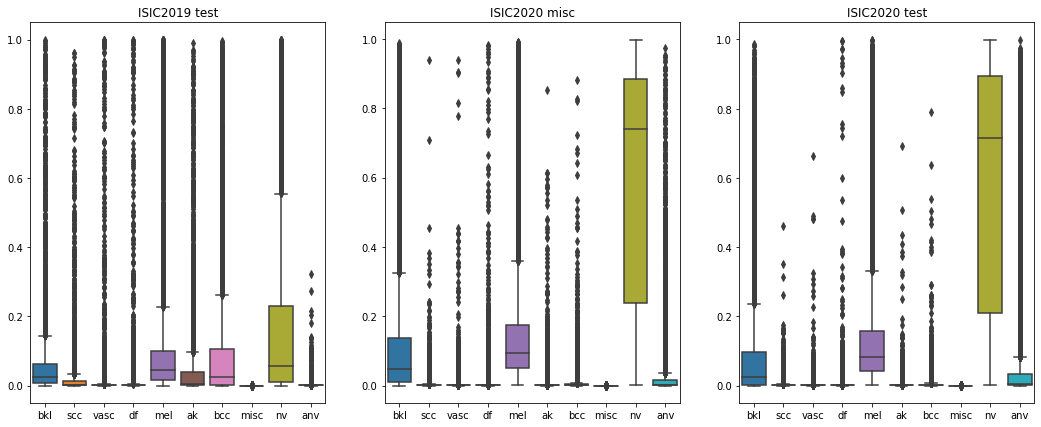

In [6]:
fig, ax = plt.subplots(ncols=3, figsize=(18,7))
sns.boxplot(data=results_isic2019_test[tcols], ax=ax[0])
sns.boxplot(data=results_isic2020_misc[tcols], ax=ax[1])
sns.boxplot(data=results_isic2020_test[tcols], ax=ax[2])
ax[0].set_title('ISIC2019 test')
ax[1].set_title('ISIC2020 misc')
ax[2].set_title('ISIC2020 test')

## Fullres

In [10]:
dest_location = 'UNLABELED/INFERRED'

target_names = ['ak', 'anv', 'bcc', 'bkl', 'df', 'mel', 'misc', 'nv', 'scc', 'vasc']
for _t in target_names:
    try:
        os.mkdir(dest_location+"/"+_t)
    except Exception as e:
        print("Did not create folder: {}".format(e))

Did not create folder: [Errno 17] File exists: 'UNLABELED/INFERRED/ak'
Did not create folder: [Errno 17] File exists: 'UNLABELED/INFERRED/anv'
Did not create folder: [Errno 17] File exists: 'UNLABELED/INFERRED/bcc'
Did not create folder: [Errno 17] File exists: 'UNLABELED/INFERRED/bkl'
Did not create folder: [Errno 17] File exists: 'UNLABELED/INFERRED/df'
Did not create folder: [Errno 17] File exists: 'UNLABELED/INFERRED/mel'
Did not create folder: [Errno 17] File exists: 'UNLABELED/INFERRED/misc'
Did not create folder: [Errno 17] File exists: 'UNLABELED/INFERRED/nv'
Did not create folder: [Errno 17] File exists: 'UNLABELED/INFERRED/scc'
Did not create folder: [Errno 17] File exists: 'UNLABELED/INFERRED/vasc'


In [14]:
image_location = 'UNLABELED/ISIC2019_test_fullres/'

source = results_isic2019_test.loc[~results_isic2019_test.target.isna(), ['image_name', 'target']]
for _t in tqdm(source.itertuples()):
    source_loc = image_location+'/'+_t[1]+".jpg"
    dest_loc = dest_location+"/"+_t[2]
    cp_file_to_class_folder(source_loc, dest_loc)

1172it [00:02, 421.16it/s]


In [12]:
image_location = 'UNLABELED/ISIC2020_test_fullres/'

source = results_isic2020_test.loc[~results_isic2020_test.target.isna(), ['image_name', 'target']]
for _t in tqdm(source.itertuples()):
    source_loc = image_location+'/'+_t[1]+".jpg"
    dest_loc = dest_location+"/"+_t[2]
    cp_file_to_class_folder(source_loc, dest_loc)

2965it [00:02, 1295.69it/s]


In [100]:
image_location = 'UNLABELED/misc_fullres/'

source = results_isic2020_misc.loc[~results_isic2020_misc.target.isna(), ['image_name', 'target']]
for _t in tqdm(source.itertuples()):
    source_loc = image_location+'/'+_t[1]+".jpg"
    dest_loc = dest_location+"/"+_t[2]
    cp_file_to_class_folder(source_loc, dest_loc)

27124it [01:17, 350.68it/s]


## res 1024

In [11]:
dest_location = 'UNLABELED/INFERRED_1024'

target_names = ['ak', 'anv', 'bcc', 'bkl', 'df', 'mel', 'misc', 'nv', 'scc', 'vasc']
for _t in target_names:
    try:
        os.mkdir(dest_location+"/"+_t)
    except Exception as e:
        print("Did not create folder: {}".format(e))

In [15]:
image_location = 'UNLABELED/ISIC2019_test_1024/'
        
source = results_isic2019_test.loc[~results_isic2019_test.target.isna(), ['image_name', 'target']]
for _t in tqdm(source.itertuples()):
    source_loc = image_location+'/'+_t[1]+".jpg"
    dest_loc = dest_location+"/"+_t[2]
    cp_file_to_class_folder(source_loc, dest_loc)

1172it [00:02, 414.33it/s]


In [13]:
image_location = 'UNLABELED/ISIC2020_test_1024/'

source = results_isic2020_test.loc[~results_isic2020_test.target.isna(), ['image_name', 'target']]
for _t in tqdm(source.itertuples()):
    source_loc = image_location+'/'+_t[1]+".jpg"
    dest_loc = dest_location+"/"+_t[2]
    cp_file_to_class_folder(source_loc, dest_loc)

2965it [00:01, 1864.49it/s]


In [101]:
image_location = 'UNLABELED/misc_1024/'

source = results_isic2020_misc.loc[~results_isic2020_misc.target.isna(), ['image_name', 'target']]
for _t in tqdm(source.itertuples()):
    source_loc = image_location+'/'+_t[1]+".jpg"
    dest_loc = dest_location+"/"+_t[2]
    cp_file_to_class_folder(source_loc, dest_loc)

27124it [00:11, 2281.58it/s]
